In [31]:
# 📁 Cellule 1 : Import des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import numpy as np

In [38]:
all_files = [
    "data/tirage/euromillions_202002/euromillions_202002.csv",
]

In [39]:
dfs = []
for file in all_files:
    df = pd.read_csv(file, sep=';', encoding='utf-8')
    dfs.append(df)

# Fusion en un seul DataFrame
data = pd.concat(dfs, ignore_index=True)

In [40]:
# 📁 Cellule 3 : Nettoyage
for col in data.columns:
    if data[col].dtype == object:
        data[col] = data[col].str.replace(r'\s+', '', regex=True)  # Supprime les espaces
        data[col] = data[col].str.replace(',', '.', regex=False)   # Remplace virgule par point

# Conversion sûre des colonnes numériques
for col in data.columns:
    try:
        data[col] = pd.to_numeric(data[col])
    except Exception:
        pass

# Conversion des dates
data['date_de_tirage'] = pd.to_datetime(data['date_de_tirage'], errors='coerce')

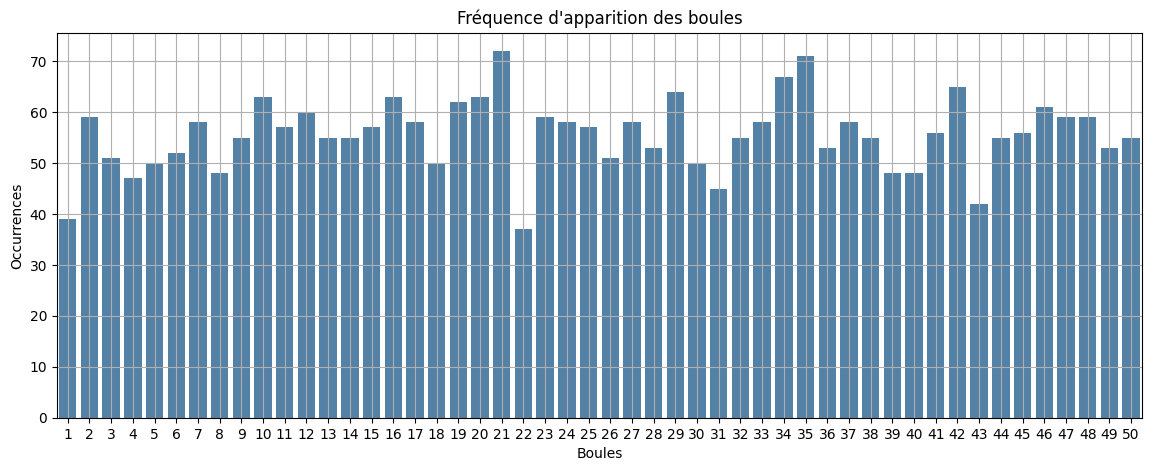

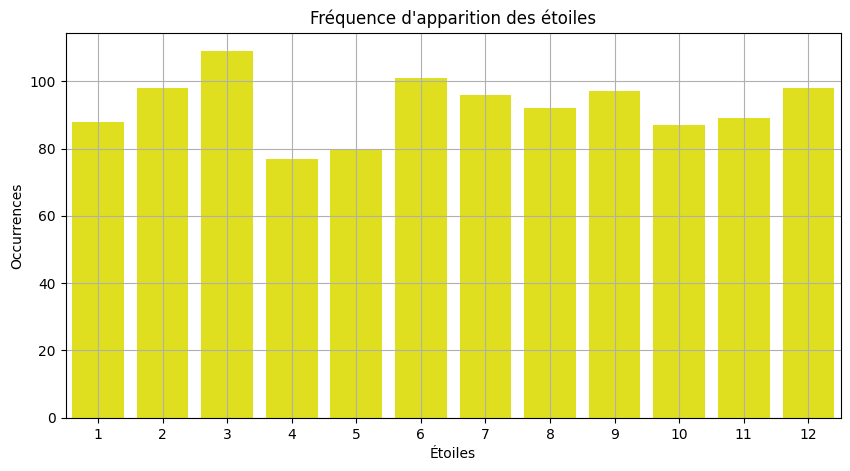

In [41]:
# 📈 Cellule 4 : Analyse de fréquence des boules et étoiles
boule_cols = ['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']
etoile_cols = ['etoile_1', 'etoile_2']

boules = pd.melt(data[boule_cols])
etoiles = pd.melt(data[etoile_cols])

plt.figure(figsize=(14,5))
sns.countplot(x='value', data=boules, color='steelblue')
plt.title("Fréquence d'apparition des boules")
plt.xlabel("Boules")
plt.ylabel("Occurrences")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='value', data=etoiles, color='yellow')
plt.title("Fréquence d'apparition des étoiles")
plt.xlabel("Étoiles")
plt.ylabel("Occurrences")
plt.grid(True)
plt.show()

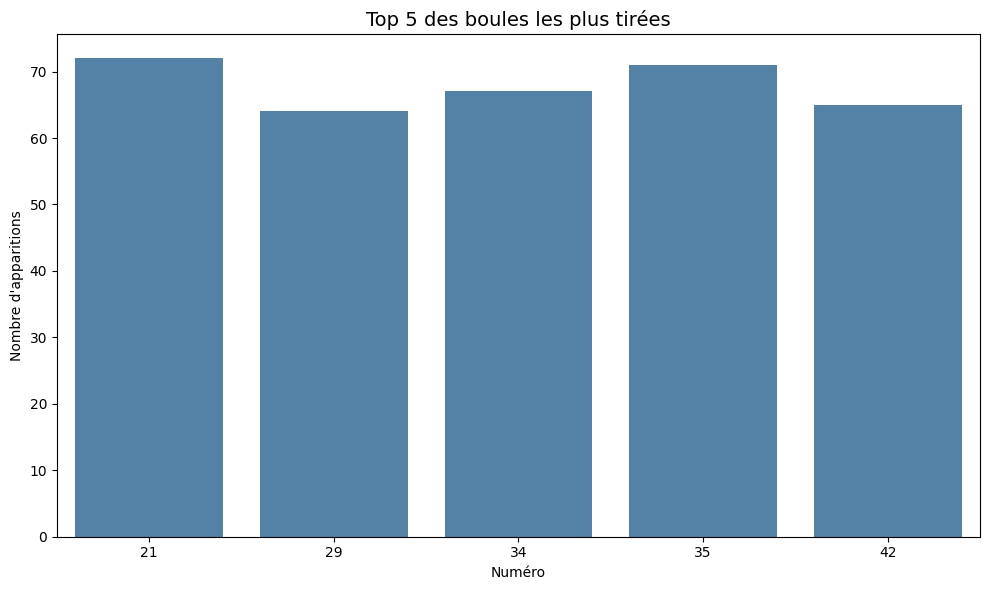

In [42]:
# 📌 Extraire toutes les boules dans une seule série
boule_cols = ['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']
boules = data[boule_cols].melt(value_name='value')['value'].dropna().astype(int)

# 🔢 Compter les occurrences
top_boules = boules.value_counts().sort_values(ascending=False).head(5)

# 📈 Affichage du graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=top_boules.index, y=top_boules.values, color='steelblue')

plt.title("Top 5 des boules les plus tirées", fontsize=14)
plt.xlabel("Numéro")
plt.ylabel("Nombre d'apparitions")
plt.tight_layout()
plt.show()

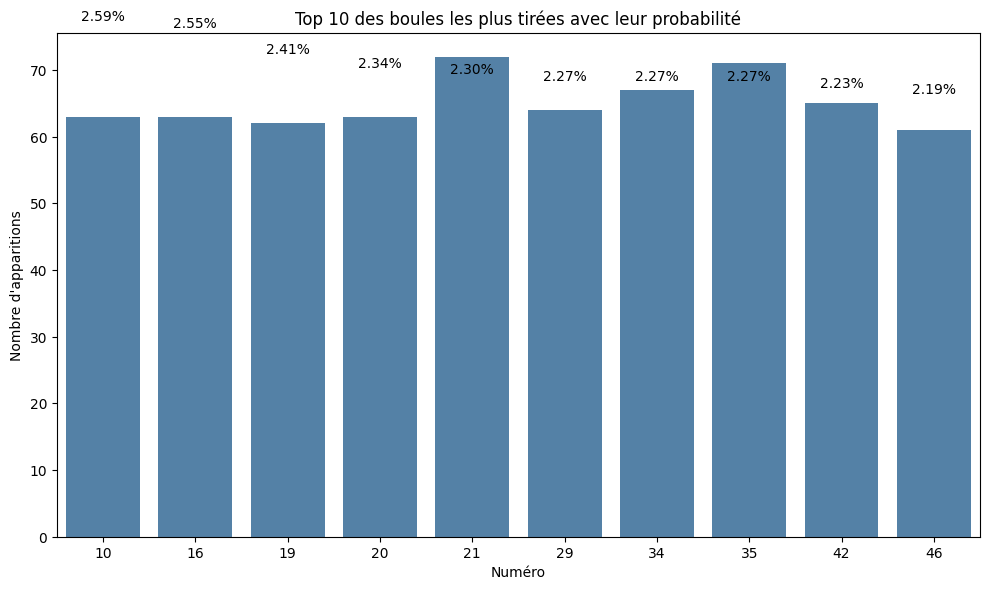

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Extraire toutes les boules
boule_cols = ['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']
boules = data[boule_cols].melt(value_name='value')['value'].dropna().astype(int)

# 🔢 Comptage
counts = boules.value_counts().sort_values(ascending=False)
total = counts.sum()

# 🧮 Ajouter les probabilités
top_boules = counts.head(10)
proba = top_boules / total

# 📊 Graphique avec les probabilités annotées
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_boules.index, y=top_boules.values, color='steelblue')

# 📝 Ajouter les étiquettes sur les barres
for i, (count, p) in enumerate(zip(top_boules.values, proba.values)):
    ax.text(i, count + 5, f"{p:.2%}", ha='center', va='bottom', fontsize=10)

plt.title("Top 10 des boules les plus tirées avec leur probabilité")
plt.xlabel("Numéro")
plt.ylabel("Nombre d'apparitions")
plt.tight_layout()
plt.show()

In [44]:
# Étape 1 : top 5 boules
top5_boules = counts.head(5).index.tolist()

# Étape 2 et 3 : filtrer les tirages contenant toutes les boules du top 5
def contient_top5(row):
    boules_tirage = {row['boule_1'], row['boule_2'], row['boule_3'], row['boule_4'], row['boule_5']}
    return set(top5_boules).issubset(boules_tirage)

# Appliquer le filtre
tirages_top5 = data[data.apply(contient_top5, axis=1)]

# Étape 4 : afficher les dates des tirages correspondants
dates_top5 = tirages_top5['date_de_tirage'].dt.strftime('%Y-%m-%d').tolist()

print("Dates des tirages contenant toutes les boules du top 5 :")
for d in dates_top5:
    print(d)

# Si tu veux voir aussi les numéros exacts :
print(tirages_top5[['date_de_tirage', 'boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']])


Dates des tirages contenant toutes les boules du top 5 :
Empty DataFrame
Columns: [date_de_tirage, boule_1, boule_2, boule_3, boule_4, boule_5]
Index: []


In [45]:
top5_boules = counts.head(5).index.tolist()

def au_moins_n_top(row, n=4):
    boules_tirage = {row['boule_1'], row['boule_2'], row['boule_3'], row['boule_4'], row['boule_5']}
    # Compte combien de boules du top5 sont présentes
    return len(set(top5_boules).intersection(boules_tirage)) >= 3

tirages_min4 = data[data.apply(au_moins_n_top, axis=1)]

dates_min4 = tirages_min4['date_de_tirage'].dt.strftime('%Y-%m-%d').tolist()

print(f"Dates des tirages contenant au moins 4 boules du top 5 :")
for d in dates_min4:
    print(d)

# Optionnel : voir les tirages complets
print(tirages_min4[['date_de_tirage', 'boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']])


Dates des tirages contenant au moins 4 boules du top 5 :
2025-04-03
2023-06-10
nan
2022-12-08
nan
nan
    date_de_tirage  boule_1  boule_2  boule_3  boule_4  boule_5
26      2025-04-03       29       42       15       20       35
173     2023-06-10       31       43       21       29       34
264            NaT       24       29       42       21       22
293     2022-12-08       14       42       35       17       34
466            NaT       21        9       35       13       29
536            NaT       40       34       29        6       35
